In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# predata = pd.read_excel('people-20210222.xlsx', sheet_name='新label')
# predata = pd.read_excel('iR-20210224.xlsx', sheet_name='数字数据')
data224 = pd.read_excel('iR-label-20210224.xlsx', sheet_name='数字数据')
print(data224.shape)
# predata.info()

data=data224
# print(dat.isnull().any().any())
# print(dat.isnull().sum())
# data.info()

(2097, 33)


In [109]:
# dat = data.loc[data.loc[(data['label']==7)].index]
# print(dat.shape)

# xdata = data[['S2','S3t1','S4','B3','B4','B5','S6','S7','S8','S11','F1',             
#       'H2','H4','H5','E4','B1s1','B1s2','B1s3','B1s4','B1s5',
#       'B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15',
#       'B1s16','B1s17','B1s18','B1s19','B1s20', 'frequencyMI','totalValueMI','配件消费']] 

# print(xdata.shape)

xdata2 =  data[['S2','S3t1','S4','S7','S8','F1','B3','B4','frequencyMI','totalValueMI','配件消费']]
print(xdata2.shape)

# new3=data[['frequencyMI','totalValueMI','配件消费']]
# new3.shape
# print(new.shape)
# minlei.shape
# minlei.head()
# xlei = minlei[['S2','S3t1','S4','B3','B4','B5','S6','S7','S8','S11','F1',             
#       'H2','H4','H5','E4','B1s1','B1s2','B1s3','B1s4','B1s5',
#       'B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15',
#       'B1s16','B1s17','B1s18','B1s19','B1s20']]
# print(xlei.shape)

(2097, 11)


In [110]:
#对xdata进行标准化处理
s_raw = xdata2.apply(lambda x:(x-x.mean())/x.std())
print(s_raw.shape)
s_raw.head()

(2097, 11)


,S2,S3t1,S4,S7,S8,F1,B3,B4,frequencyMI,totalValueMI,配件消费
0,1.168846,0.581693,-2.168169,1.486867,2.847030,1.007900,0.928230,0.702183,0.138318,1.501760,0.225370
1,1.168846,-0.051769,-0.872643,1.486867,-0.914332,1.007900,-0.081888,-2.495381,-0.567406,0.192391,0.044091
2,1.168846,0.977608,-1.520406,1.486867,-0.914332,-0.991689,-2.102126,0.702183,-0.567406,-0.542132,-0.245955
3,1.168846,0.027414,-0.872643,-0.788020,0.026008,1.007900,-1.092007,-1.695990,-0.567406,-0.255349,-0.300338
4,-0.848495,-0.130952,0.422884,-0.333043,0.026008,1.007900,-0.081888,-0.097208,0.138318,0.042293,2.581992


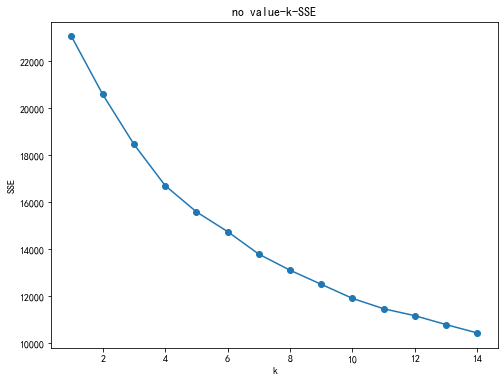

In [111]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []  # 存放每次结果的误差平方和
for k in range(1,15):
    estimator = KMeans(n_clusters=k,random_state=122)  # 构造聚类器
    estimator.fit(s_raw)
    SSE.append(estimator.inertia_)
X = range(1,15)
plt.figure(figsize=(8,6))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('no value-k-SSE') 
plt.plot(X,SSE,'o-')
# plt.savefig('SSE(no value).png')
plt.show()

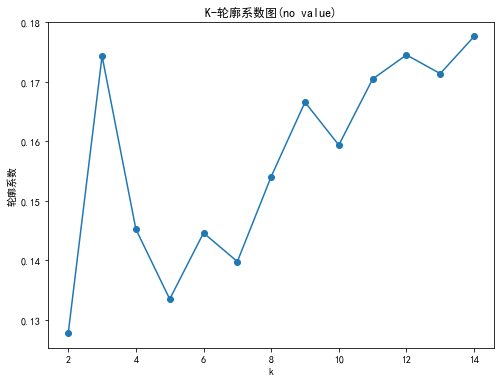

In [113]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

Scores = []  # 存放轮廓系数
for k in range(2,15):
    estimator = KMeans(n_clusters=k,random_state=555)  # 构造聚类器 666
    estimator.fit(s_raw)
    Scores.append(silhouette_score(s_raw,estimator.labels_,metric='euclidean'))
X = range(2,15)
plt.figure(figsize=(8,6))
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.title('K-轮廓系数图(no value)') 
plt.plot(X,Scores,'o-')
# plt.savefig('no value-轮廓系数.png')
plt.show()

## k==2分成2类

In [114]:
import pandas as pd
#参数初始化
k = 9 #聚类的类别
iteration = 3 #聚类最大循环次数

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, max_iter = iteration, random_state=555) #分为k类
#model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) #分为k类，并发数4
model.fit(s_raw) #开始聚类

#简单打印结果
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
print(r)
r.columns = list(s_raw.columns) + [u'类别数目'] #重命名表头
print(r)

#详细输出原始数据及其类别
r = pd.concat([xdata2, pd.Series(model.labels_, index =xdata.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(xdata2.columns) + [u'聚类类别'] #重命名表头
# r.to_excel(outputfile) #保存结果
print(r)

         0         1         2         3         4         5         6   \
0 -0.012037 -0.745377 -0.705623 -0.375845 -0.422865  0.346015 -0.388092   
1  0.567183  1.051234  0.583878  0.462503  0.837121 -0.512256 -0.016910   
2 -0.538857 -0.142737  0.466570  0.046811 -0.452909 -0.991689  0.488946   
3  0.620579 -0.068599 -1.247307  0.857508 -0.069009 -0.267100 -1.222231   
4  0.354391 -0.150625  0.141248 -0.149356 -0.359473  0.461428  0.639625   
5 -0.544513 -0.115947  0.368164 -0.395368 -0.128568  1.007900  0.388578   
6 -0.114917 -0.393695 -0.048216 -0.250319 -0.144963 -0.809908 -0.081888   
7 -0.013734 -0.103647  0.210686  0.121935 -0.476587  0.180483  0.196765   
8  0.664510  0.349644 -0.485784 -1.679018  2.703367  0.980127 -0.348448   

         7         8         9         10   0   
0 -1.576221 -0.274789 -0.210648 -0.058486  287  
1 -0.485216 -0.214544 -0.391786 -0.226608  355  
2  0.592499 -0.162025 -0.116722  0.078914  428  
3  0.276027 -0.188725 -0.201065  0.073525  271  
4  0

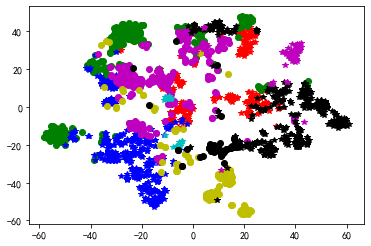

In [118]:
#用TSNE进行数据降维并展示聚类结果
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(s_raw) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_, index = s_raw.index) #转换数据格式

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]     #找出聚类类别为0的数据对应的降维结果
plt.plot(d[0], d[1], 'r*')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
d = tsne[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], 'mo') 
d = tsne[r[u'聚类类别'] == 4]
plt.plot(d[0], d[1], 'yo')
d = tsne[r[u'聚类类别'] == 5]
plt.plot(d[0], d[1], 'k*')
d = tsne[r[u'聚类类别'] == 6]
plt.plot(d[0], d[1], 'c*')
d = tsne[r[u'聚类类别'] == 7]
plt.plot(d[0], d[1], 'ko')
d = tsne[r[u'聚类类别'] == 8]
plt.plot(d[0], d[1], 'm*')
d = tsne[r[u'聚类类别'] == 9]
plt.plot(d[0], d[1], 'kD')
d = tsne[r[u'聚类类别'] == 10]
plt.plot(d[0], d[1], 'y8')
d = tsne[r[u'聚类类别'] == 11]
plt.plot(d[0], d[1], 'c*')

plt.savefig('224-9类.png')
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   NO            2097 non-null   int64
 1   S2            2097 non-null   int64
 2   S3t1          2097 non-null   int64
 3   S4            2097 non-null   int64
 4   S7            2097 non-null   int64
 5   S8            2097 non-null   int64
 6   F1            2097 non-null   int64
 7   B3            2097 non-null   int64
 8   B4            2097 non-null   int64
 9   frequencyMI   2097 non-null   int64
 10  totalValueMI  2097 non-null   int64
 11  配件消费          2097 non-null   int64
 12  B1s1          2097 non-null   int64
 13  B1s2          2097 non-null   int64
 14  B1s3          2097 non-null   int64
 15  B1s4          2097 non-null   int64
 16  B1s5          2097 non-null   int64
 17  B1s6          2097 non-null   int64
 18  B1s7          2097 non-null   int64
 19  B1s8          2097 non-null

In [50]:
## 决策树
redata = data[['S2','S3t1','S4','S7','S8','F1','B3','B4','label']]
#'B1s1','B1s2','B1s3','B1s4','B1s5','B1s6',
#                'B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15','B1s16','B1s17','B1s18','B1s19','B1s20',

In [51]:
X = redata.drop(['label'],axis=1)
Y = redata['label']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)
print(X.shape)
print(Y.shape)
print(Xtrain.shape)
print(Xtest.shape)

(2097, 8)
(2097,)
(1677, 8)
(420, 8)


In [56]:
clf = DecisionTreeClassifier(random_state=8, class_weight='balanced') # 初始化
clf = clf.fit(Xtrain,Ytrain) # 拟合

# 分类准确率
score_ = clf.score(Xtest, Ytest) # 验证集查看得分
print('准确率为:', score_)

# 可以输入数据送到训练好的模型里，输出预测的类
y_pred = clf.predict(Xtest)
print(y_pred[:10])

#看特征变量的使用情况
# [*zip(feature_name,clf.feature_importances_)]

准确率为: 0.38571428571428573
[6 6 0 6 6 0 5 0 6 6]


In [63]:
#生成决策树
from sklearn.tree import DecisionTreeClassifier
#设置最大叶子数为8
dtModel = DecisionTreeClassifier(random_state=8,class_weight='balanced', max_leaf_nodes=12) 

#模型检验－交叉验证法
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtModel,X,Y,cv=10).mean())

#训练模型
dtModel=dtModel.fit(X, Y) 

0.32147186147186146


In [64]:
# tree模型可视化
import re
import pydotplus
from six import StringIO  #生成StringIO对象
from sklearn.tree import export_graphviz
# dot_data = StringIO() #把文件暂时写在内存的对象中
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

dot_data = export_graphviz(
    dtModel,
    out_file=None,
    class_names=['0','1','2','3','4','5','6','7'],
#     feature_names=['性别', '年龄', '家庭年收入', '教育水平', '种族', '宗教信仰', '上次为谁购买', '第一次演奏乐器时间', '使用乐器频率', '哪一年购买乐器',
#        '是否可以演奏多种乐器', '上次在哪里购买', '购物思考时间', '购物方式', '音乐APP', '质量','定制化','新潮','简约','传统','归属感','刺激','自然',
#         '服务','自由自在','激情','高尚','科技','活力','进取','明智购物','个人效率','古典','安逸','全面成本','乐器的总购买数量','乐器的总购买金额','配件金额'],
    
    feature_names=['性别', '年龄', '家庭年收入', '第一次演奏乐器时间', '当前弹奏情况', '是否可以演奏多种乐器', '教育水平', '种族'],
#               'S2','S3t1','S4','S7','S8','F1','B3','B4','frequencyMI','totalValueMI','配件消费'
    
#     feature_names=['乐器的总购买数量','乐器的总购买金额','配件金额'],
#     feature_names=['S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S8','S11','F1',
#       'H2','H4','H5','E1','E4','E6','U1','U3','B1s1','B1s2','B1s3','B1s4','B1s5',
#       'B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15',
#       'B1s16','B1s17','B1s18','B1s19','B1s20','totalValueTTL'],
    filled=True,rounded=True,special_characters=True
)

with open("dot_data.dot", 'w+', encoding="utf-8-sig") as f:  # 注意编码方式
    f.writelines(dot_data)
    
# 打开 dot_data.dot，修改 fontname="支持的中文字体"
f = open("dot_data.dot",  encoding="utf-8-sig")
open('dot_test.dot', 'w+', encoding="utf-8-sig").write(re.sub(r'fontname=helvetica', 'fontname="Microsoft YaHei"', f.read()))

with open("dot_test.dot",  encoding="utf-8-sig") as fp:
    dot_test = fp.read()
    
graph = pydotplus.graph_from_dot_data(dot_test)  #.getvalue()
graph.write_pdf('224-8-无价值观.pdf')

True

In [136]:
data["label"]=r['聚类类别']
result_avg=data.groupby("label").mean()
result_avg=result_avg.join(data.label.value_counts())
result_avg["rate"]=result_avg["label"]/sum(result_avg["label"])
print(result_avg[['label','rate']])

       label      rate
label                 
0        287  0.136862
1        355  0.169289
2        428  0.204101
3        271  0.129232
4        164  0.078207
5        443  0.211254
6         23  0.010968
7         53  0.025274
8         73  0.034812


In [ ]:
data.to_csv('去除价值观+去除职业决策树.csv')

In [ ]:
data.head()